In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline 

读取图像

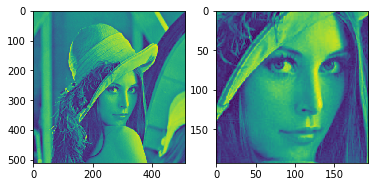

In [59]:
img_raw = cv2.imread('image.jpg')
tp_raw = cv2.imread('template.jpg')

img = cv2.cvtColor(img_raw,cv2.COLOR_BGR2GRAY)
tp = cv2.cvtColor(tp_raw,cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(tp)

高斯滤波

In [29]:
kernel_size = 3
img_gs = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
tp_gs = cv2.GaussianBlur(tp, (kernel_size, kernel_size), 0)

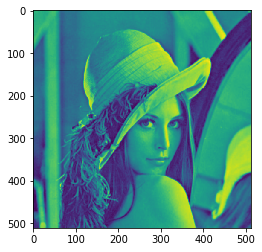

In [30]:
plt.imshow(img_gs)

In [31]:
res = cv2.matchTemplate(img_gs,tp_gs,3)

In [32]:
res.shape

(319, 319)

In [33]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [34]:
max_val

0.999170184135437

In [35]:
max_loc

(185, 197)

In [36]:
tp.shape

(193, 193)

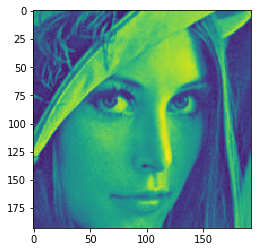

In [37]:
plt.imshow(img[max_loc[0]:max_loc[0]+193, max_loc[1]:max_loc[1]+193])

In [62]:
import numpy as np
_ = []
for i in range(185, 185+193):
    for j in range(197, 197+193):
        _.append((i, j))
_ = np.array(_)

In [63]:
draw_img = img_raw.copy()
rect = cv2.minAreaRect(_)
box = cv2.boxPoints(rect)
box = np.int64(box)
_ = cv2.drawContours(draw_img, [box], 0, (255, 0, 0), 2)

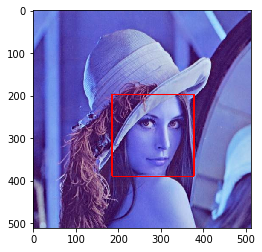

In [64]:
plt.imshow(_)

In [55]:
img_raw.shape

(511, 511, 3)

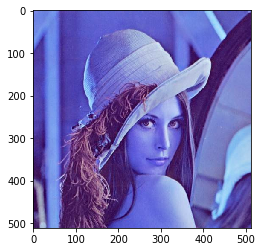

In [60]:
plt.imshow(img_raw)